# Домашнее задание 5

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_5

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} f(x) = \frac{1}{2}x^T A x - b^T x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица с $L =1000$, $\mu = 1$, $d = 100$, $b$ - так же случайный вектор.

__(а)__ Для такой задачи симулируем итерацию SGD:
$$
x^{k+1} = x^k - \gamma (\nabla f(x^k) + \xi^k),
$$
где $\xi^k$ - независимая от $x^k$ случайная величина из нормального распределения $\mathcal{N}(0, 100)$.

Для такого метода с $\gamma = \frac{1}{L}$ постройте график сходимости (критерий $\| \nabla f(x^k)\|^2$). Постройте на этом же графике сходимость честного градиентного спуска c $\gamma = \frac{1}{L}$. Сделайте вывод о характере сходимости нового метода.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math 
import time
%matplotlib inline
import scipy.stats

In [2]:
def generate_matrix(d, m, L):
    D = (L-m)*np.random.random_sample(d) + m
    #print(D)
    D[0] = d
    D[1] = m
    D = np.diag(D)
    S = scipy.stats.ortho_group.rvs(d) 
    #print(S)
    return S@D@S.T

L = 1000
mu = 1
d = 100
sigma = 10
m = 0
N = 10000

A = generate_matrix(d, mu, L)
b = np.random.normal(m, sigma, d)

In [3]:
def gradient(x):
    return A @ x - b

criterion = []
def gradient_descent(gradient, x_0, learning_rate, iter_number):
    x = x_0
    for _ in range(iter_number):
        gr = gradient(x)
        x = x - learning_rate * gr
        criterion.append(np.linalg.norm(gr))
    return x

scriterion = []
def stochastic_gradient_descent(gradient, x_0, learning_rate, iter_number):
    x = x_0
    for _ in range(iter_number):
        gr = gradient(x)
        xi = np.random.normal(0, 10, d)
        x = x - learning_rate * (gr + xi)
        scriterion.append(np.linalg.norm(gr))
    return x

In [4]:
criterion = []
x = gradient_descent(gradient, [0] * d, 1 / L, N)
criterion1 = criterion
scriterion = []
x = stochastic_gradient_descent(gradient, [0] * d, 1 / L, N)


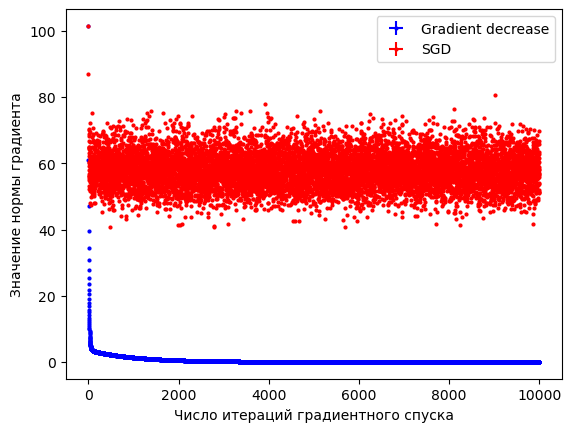

In [5]:
plt.ylabel("Значение нормы градиента")
plt.xlabel("Число итераций градиентного спуска")
plt.errorbar(range(N), criterion, yerr = 0, xerr = 0, fmt = 'o',
color = 'b', ms = 2, label = 'Gradient decrease')
plt.errorbar(range(N), scriterion, yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'SGD')
plt.legend()

Заметно, что метод SGD не сходится c этими константами.

__(б)__ На семинаре обсуждались способы борьбы со "стохастичностью" сходимости градиентного спуска. В частности, мы затронули использование уменьшающегося шага (смотри, например, Теорему 5 из [работы](https://arxiv.org/pdf/1907.04232.pdf)), а также использование батчирования (в нашем случае это просто замена: $\xi^k \to \frac{1}{b} \sum\limits_{i=1}^b \xi^k_i$, где $\xi^k_i \in \mathcal{N}(0, 100)$ и независимы). Реализуйте эти модификации (для батчирования возьмите $b = 10 , 100$). Добавьте полученные результаты на график сходимости из пункта (а). Постройте также график сходимости, где по оси $x$ будет не количество итераций, а количество генераций $\xi^k_i$ (количество вызовов стохастического градиента).

In [6]:
def generate_xi(m, sigma, d, b):
    res = 0
    for i in range(b):
        res=res + np.random.normal(m, sigma, d)
    res = res/b
    #print(len(X)-1, len(X))
    if(len(X)==0): X.append(b)
    else: X.append(X[len(X)-1]+b)
    return res
    

criterion = []
X=[]

def stochastic_gradient_descent_modified(gradient, x_0, learning_rate, iter_number, b):
    x = x_0
    for _ in range(iter_number):
        gr = gradient(x)
        xi = generate_xi(0, 10, d, b)
        x = x - learning_rate * (gr + xi)
        criterion.append(np.linalg.norm(gr))
    return x

N=10000

criterion = []
x = stochastic_gradient_descent_modified(gradient, [0] * d, 1 / L, N, 10)
criterion10 = criterion
X10 = X
criterion = []
X=[]
x = stochastic_gradient_descent_modified(gradient, [0] * d, 1 / L, N, 100)
X100 = X
criterion100 = criterion


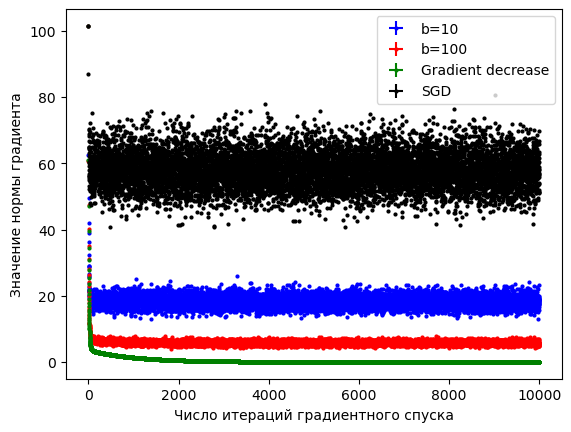

In [7]:
N1=10000

plt.ylabel("Значение нормы градиента")
plt.xlabel("Число итераций градиентного спуска")
plt.errorbar(range(N), criterion10[:N], yerr = 0, xerr = 0, fmt = 'o',
color = 'b', ms = 2, label = 'b=10')
plt.errorbar(range(N), criterion100[:N], yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'b=100')
plt.errorbar(range(N), criterion1[:N], yerr = 0, xerr = 0, fmt = 'o',
color = 'g', ms = 2, label = 'Gradient decrease')
plt.errorbar(range(N), scriterion[:N], yerr = 0, xerr = 0, fmt = 'o',
color = '0', ms = 2, label = 'SGD')
plt.legend()

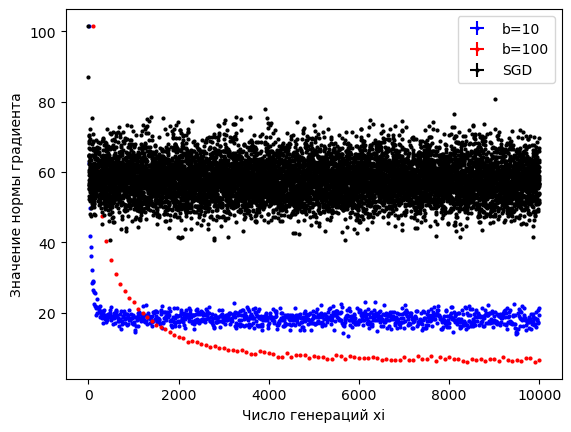

In [8]:
plt.ylabel("Значение нормы градиента")
plt.xlabel("Число генераций xi")
plt.errorbar(X10[:int(N/10)], criterion10[:int(N/10)], yerr = 0, xerr = 0, fmt = 'o',
color = 'b', ms = 2, label = 'b=10')
plt.errorbar(X100[:int(N/100)], criterion100[:int(N/100)], yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'b=100')
plt.errorbar(range(len(scriterion)), scriterion, yerr = 0, xerr = 0, fmt = 'o',
color = '0', ms = 2, label = 'SGD')
plt.legend()

В зависимости от числа генераций лучшим оказался метод с наибольшим $b=10$

## Задача 2

Рассмотрим задачу логистической регрессии на датасете mushrooms с $\ell_2$-регуляризацией (коэффициент регуляризации равен $\frac{L}{1000}$). Как мы знаем, эта задача имеет вид конечной суммы:
\begin{equation}
\min_{w \in \mathbb{R}^d} f(w) := \frac{1}{n} \sum\limits_{j=1}^n f_j(w) := \frac{1}{n} \sum\limits_{j=1}^n \left[\frac{1}{b} \sum\limits_{i=1}^b f_{ji}(w)\right] := \frac{1}{n} \sum\limits_{j=1}^n \left[\frac{1}{b} \sum\limits_{i=1}^b l (g(w, x_i), y_i)\right],
\end{equation}
где $nb = N$ - полный размер выборки. Решите данную задачу с помощью SGD, SAGA (секция А.5 из [работы](https://arxiv.org/pdf/1905.11261.pdf)), SVRG (секция А.9 из [работы](https://arxiv.org/pdf/1905.11261.pdf)) и SARAH ([работа](https://arxiv.org/pdf/1703.00102.pdf)). 

__(а)__ Оцените $\mu$ и $L$ для данной задачи. Обратите внимание, что теория для SAGA, SVRG, SARAH предполагает, что $L$ - это константа Липшица градиентов $\nabla f_j$. 

In [9]:
from sklearn.datasets import load_svmlight_file

dataset = "mushrooms.txt"
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
#y = 2 * y - 3
N, d = X.shape

print(N,d)

8124 112


In [10]:
batch_size = 50
n = N//batch_size
sample_indices = np.random.randint(0, N, batch_size)
X_batch = X[sample_indices, :]
Y_batch = y[sample_indices]
eigvals=np.linalg.eigvals((X_batch.T@X_batch + 2 * L/1000 * np.identity(d)))
L = 1/batch_size * 2 * max(eigvals)
print(f"L = {L} \n")
mu = 1/batch_size * 2  * min(eigvals)
print(f"mu = {mu} \n")


L = (20.54649564038604+0j) 

mu = (0.0799999999999997+0j) 



$\mu \approx 0$, поэтому задачу считаем выпуклой, но не сильно выпуклой

__(б)__ Реализуйте SGD, SAGA, SVRG, SARAH для задачи логистической регресии из $n$ слагаемых, где каждое слагаемое так же имеет виды суммы размеры $b$. Каким надо взять $b$? Почему? Что об этом говорит теория? Как будете выбирать шаг и другие параметры методов?

$b$ берем малым

SGD: $\gamma = \frac{1}{L}$

SAGA: $\gamma = L$

SVRG: $\gamma = L$, градиент меняется раз в 100 шагов



In [49]:
batches = []

for i in range(int(N/batch_size)):  
    batches.append(np.random.randint(0, N, batch_size))
#print(batches)

In [50]:
#SGD

def Grad_f(X, y, w, n):
   return (2*(X.T@X)@w - 2*X.T@y)/n + (L/500)/N * w

criterion = []
time_arr = []
X_gr=[]
accuracy = []

def SGD(X, y, learning_rate, iter_number, w0):
    start_time = time.time()
    w  = w0
    for _ in range(iter_number):
        i = np.random.randint(0, n)
        gr = Grad_f(X[batches[i], :], y[batches[i]], w, batch_size)
    
        criterion.append(np.linalg.norm(gr))
        time_arr.append(time.time() - start_time)
        accuracy.append(list(np.around(X@w) - y).count(0)/len(y))
    
        w = w - learning_rate*gr
    return w

w = SGD(X, y, 1/L, 1000, np.zeros(d))
#print (w)

criterion_SGD = criterion
time_arr_SGD = time_arr 
X_gr_SGD = range(1000)
accuracy_SGD = accuracy 


In [60]:
#SAGA

criterion = []
time_arr = []
X_gr=[]
accuracy = []

def SAGA(X, y, learning_rate, iter_number, w0):
    start_time = time.time()
    w  = w0
    grads = []
    gr = np.zeros(d)
    for i in range(n):
        X_cur = X[batches[i], :]
        y_cur = y[batches[i]]
        gr_i = Grad_f(X_cur, y_cur, w0, batch_size)
        if i==0: gr = gr_i/(N//batch_size)
        else: gr += gr_i/(N//batch_size)
        grads.append(gr)
    
    for k in range(iter_number):
        w = w - learning_rate*gr
        
        criterion.append(np.linalg.norm(gr))
        time_arr.append(time.time() - start_time)
        accuracy.append(list(np.around(X@w) - y).count(0)/len(y))
        X_gr.append(k + n)
        
        i = np.random.randint(0, n)
        X_cur = X[batches[i], :]
        y_cur = y[batches[i]]
        grad_i = Grad_f(X_cur, y_cur, w, batch_size)
        gr -= grads[i] /n
        gr += grad_i/n
        grads[i] = grad_i
    return w
    
        
w0 = np.zeros(d)
w = SAGA(X, y, 1/L, 1000, w0)

criterion_SAGA = criterion
time_arr_SAGA = time_arr 
X_gr_SAGA = X_gr
accuracy_SAGA = accuracy 

In [52]:
#SVRG

criterion = []
time_arr = []
X_gr=[]
accuracy = []

def SVRG(X, y, learning_rate, iter_number, w0):
    #start = time.time()
    count = 0
    w  = w0
    z = w0

    for i in range(n):
        X_cur = X[batches[i], :]
        y_cur = y[batches[i]]
        grad_i = Grad_f(X_cur, y_cur, w0, batch_size)
        if(i==0): grad_z = grad_i/n
        else: grad_z += grad_i/n
    count += n
    
    start = time.time()
    
    for k in range(iter_number):
        i = np.random.randint(0, n)
        X_cur = X[batches[i], :]
        y_cur = y[batches[i]]
        grad = grad_z - Grad_f(X_cur, y_cur, z, batch_size)/n + Grad_f(X_cur, y_cur, w, batch_size)/n

        criterion.append(np.linalg.norm(grad))
        time_arr.append(time.time() - start)
        count += 2
        X_gr.append(count)
        accuracy.append(list(np.around(X@w) - y).count(0)/len(y))

        w = w - learning_rate * grad
        if(k % 1000 == 0):
            for i in range(n):
                grad_i = Grad_f(X[batches[i], :], y[batches[i]], w, batch_size)
                if i==0: grad_z = grad_i/n
                else: grad_z += grad_i/n
            count += n
            z = np.array(w)

SVRG(X, y, 1/L, 1000, np.zeros(d))

criterion_SVRG = criterion
time_arr_SVRG = time_arr
X_gr_SVRG = X_gr
accuracy_SVRG = accuracy

In [53]:
#SARAH

criterion = []
time_arr = []
X_gr=[]
accuracy = []

def SARAH(X, y, gamma, iters, w0):
  start = time.time()
  w  = w0
  grad = np.zeros(d)
  for i in range(n):
    X_cur = X[batches[i], :]
    y_cur = y[batches[i]]
    grad_i = Grad_f(X_cur, y_cur, w0, batch_size)
    if i==0: grad = grad_i/n
    else: grad += grad_i/n

  for k in range(iters):
    i = np.random.randint(0, n)
    X_cur = X[batches[i], :]
    y_cur = y[batches[i]]
    grad = grad + Grad_f(X_cur, y_cur, w - gamma * grad, batch_size)/n - Grad_f(X_cur, y_cur, w, batch_size)/n
    w = w - gamma * grad
    criterion.append(np.linalg.norm(grad))
    end = time.time() - start
    time_arr.append(end)
    X_gr.append(2 * k + n)
    accuracy.append(list(np.around(X@w) - y).count(0)/len(y))
        
SARAH(X, y, 1/L, 1000, np.zeros(d))

criterion_SARAH = criterion
time_arr_SARAH = time_arr
X_gr_SARAH = X_gr
accuracy_SARAH = accuracy

__(в)__ Постройте графики сравнения всех методов: по оси $x$ используйте время или количество подсчетов $\nabla f_{ji}$, по оси $y$ - $\|\nabla f(w^k)\|$ или точность на тесте. Таким образом, всего 4 графика. Сделайте сравнение и вывод.

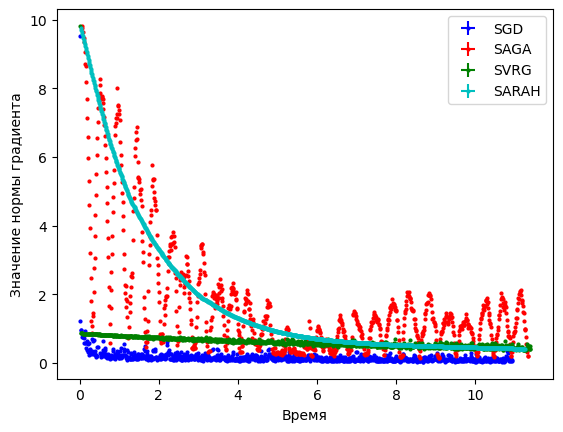

In [61]:
plt.ylabel("Значение нормы градиента")
plt.xlabel("Время")

plt.errorbar(time_arr_SGD, criterion_SGD, yerr = 0, xerr = 0, fmt = 'o',
color = 'b', ms = 2, label = 'SGD')
plt.errorbar(time_arr_SAGA, criterion_SAGA, yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'SAGA')
plt.errorbar(time_arr_SVRG, criterion_SVRG, yerr = 0, xerr = 0, fmt = 'o',
color = 'g', ms = 2, label = 'SVRG')
plt.errorbar(time_arr_SARAH, criterion_SARAH, yerr = 0, xerr = 0, fmt = 'o',
color = 'c', ms = 2, label = 'SARAH')

plt.legend()

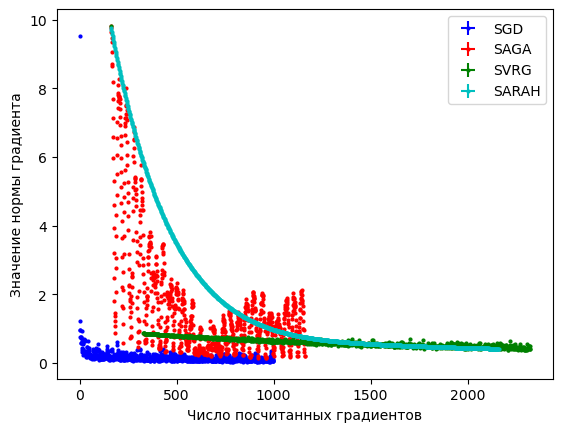

In [62]:
plt.ylabel("Значение нормы градиента")
plt.xlabel("Число посчитанных градиентов")

plt.errorbar(X_gr_SGD, criterion_SGD, yerr = 0, xerr = 0, fmt = 'o',
color = 'b', ms = 2, label = 'SGD')
plt.errorbar(X_gr_SAGA, criterion_SAGA, yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'SAGA')
plt.errorbar(X_gr_SVRG, criterion_SVRG, yerr = 0, xerr = 0, fmt = 'o',
color = 'g', ms = 2, label = 'SVRG')
plt.errorbar(X_gr_SARAH, criterion_SARAH, yerr = 0, xerr = 0, fmt = 'o',
color = 'c', ms = 2, label = 'SARAH')

plt.legend()

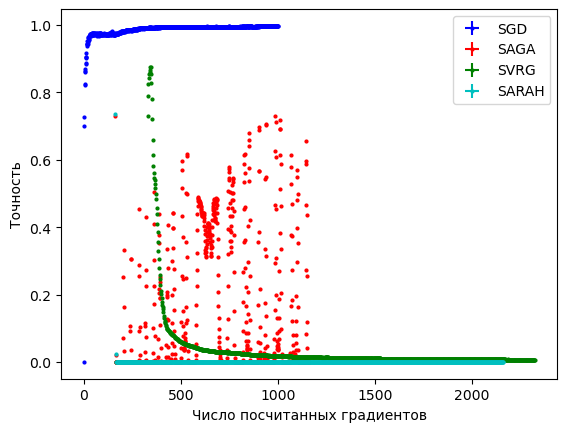

In [63]:
plt.ylabel("Точность")
plt.xlabel("Число посчитанных градиентов")

plt.errorbar(X_gr_SGD, accuracy_SGD, yerr = 0, xerr = 0, fmt = 'o',
color = 'b', ms = 2, label = 'SGD')
plt.errorbar(X_gr_SAGA, accuracy_SAGA, yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'SAGA')
plt.errorbar(X_gr_SVRG, accuracy_SVRG, yerr = 0, xerr = 0, fmt = 'o',
color = 'g', ms = 2, label = 'SVRG')
plt.errorbar(X_gr_SARAH, accuracy_SARAH, yerr = 0, xerr = 0, fmt = 'o',
color = 'c', ms = 2, label = 'SARAH')

plt.legend()

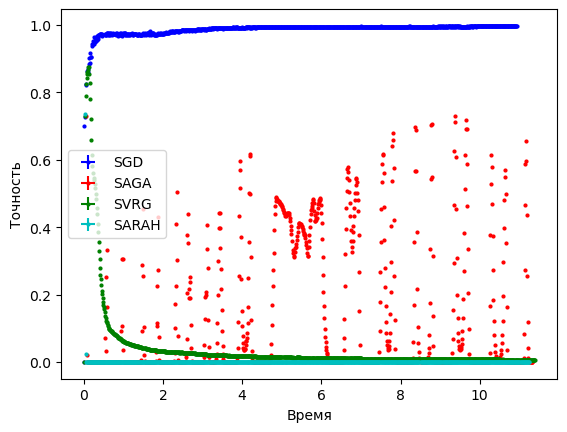

In [64]:
plt.ylabel("Точность")
plt.xlabel("Время")

plt.errorbar(time_arr_SGD, accuracy_SGD, yerr = 0, xerr = 0, fmt = 'o',
color = 'b', ms = 2, label = 'SGD')
plt.errorbar(time_arr_SAGA, accuracy_SAGA, yerr = 0, xerr = 0, fmt = 'o',
color = 'r', ms = 2, label = 'SAGA')
plt.errorbar(time_arr_SVRG, accuracy_SVRG, yerr = 0, xerr = 0, fmt = 'o',
color = 'g', ms = 2, label = 'SVRG')
plt.errorbar(time_arr_SARAH, accuracy_SARAH, yerr = 0, xerr = 0, fmt = 'o',
color = 'c', ms = 2, label = 'SARAH')

plt.legend()

Не придумал константу, чтобы saga сходилась

__Бонусные пункты__

__(г)__ Методы SGD, SAGA, SVRG, SARAH, которые мы рассматривали, предполагают случайный выбор индекса на каждой итерации. Но между тем, на практике обычно делают по-другому и просто последовательно меняют $i_k$ от $1$ до $n$ (а потом заново). В [работе](https://arxiv.org/abs/2006.05988) изучаются такие подходы. Реализуйте Random Reshuffling и Shuffle Once для SGD и SARAH. Сравните новые алгоритмы со старыми версиями SGD и SARAH из пунктов (б) и (в).

In [65]:
#ответ

__(д)__ Методы SVRG и SARAH имеют loopless версии: L-SVRG (секция А.10 из [работы](https://arxiv.org/pdf/1905.11261.pdf) и PAGE ([работа](https://proceedings.mlr.press/v139/li21a.html)), соотвественно. Реализуйте их. Как будете выбирать вероятности в этих алгоритмах? Сравните новые алгоритмы со старыми версиями SVRG и SARAH из пунктов (б) и (в).

In [66]:
#ответ